In [1]:
import pandas as pd
marketing_cl_df= pd.read_csv('marketing_campaign_cleaned.csv')
marketing_cl_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days,age,children
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,3734.521209,54.179603,0.947202
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,202.434667,11.985554,0.749062
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3381.000000,27.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3561.000000,46.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3736.500000,53.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3910.000000,64.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4080.000000,130.000000,3.000000


histogram

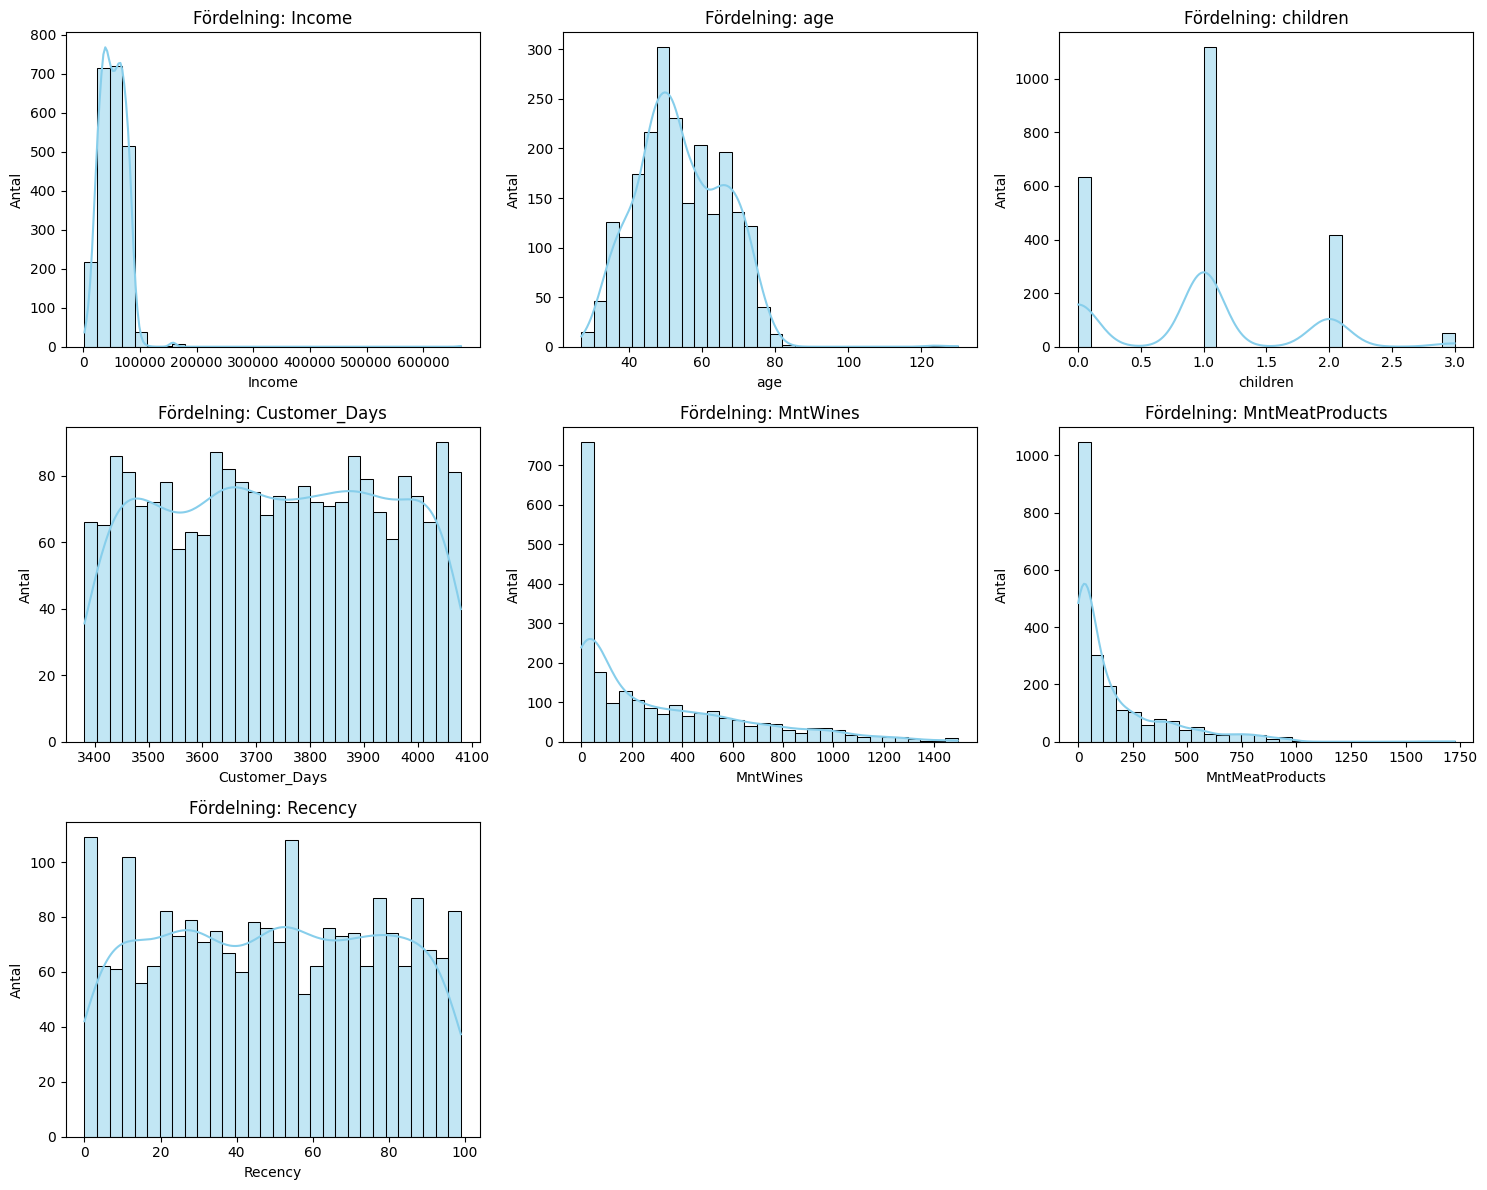

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Välj kolumner att analysera
eda_cols = ['Income', 'age', 'children', 'Customer_Days', 'MntWines', 'MntMeatProducts', 'Recency']

# Rita histogram med KDE (kärntäthetskurva)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(eda_cols):
    sns.histplot(marketing_cl_df[col], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Fördelning: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Antal")

# Dölj tomma diagram (om färre än 9)
for j in range(len(eda_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

 Tolkning av EDA:
Income: De flesta kunder tjänar mellan 20 000–80 000, men det finns några extrema värden (outliers).

Age: Majoriteten är mellan 30–70 år.

Children: De flesta har 0, 1 eller 2 barn – nästan ingen har 3.

Customer_Days: Kunderna har varit med ganska länge (3 800–4 600 dagar ≈ 10–12 år).

MntWines & MntMeatProducts: Väldigt skev fördelning – vissa kunder spenderar extremt mycket.

Recency: Ganska jämnt fördelat mellan 0–100 (antal dagar sedan senaste interaktion).

Korrelationsmatris(heatmap)

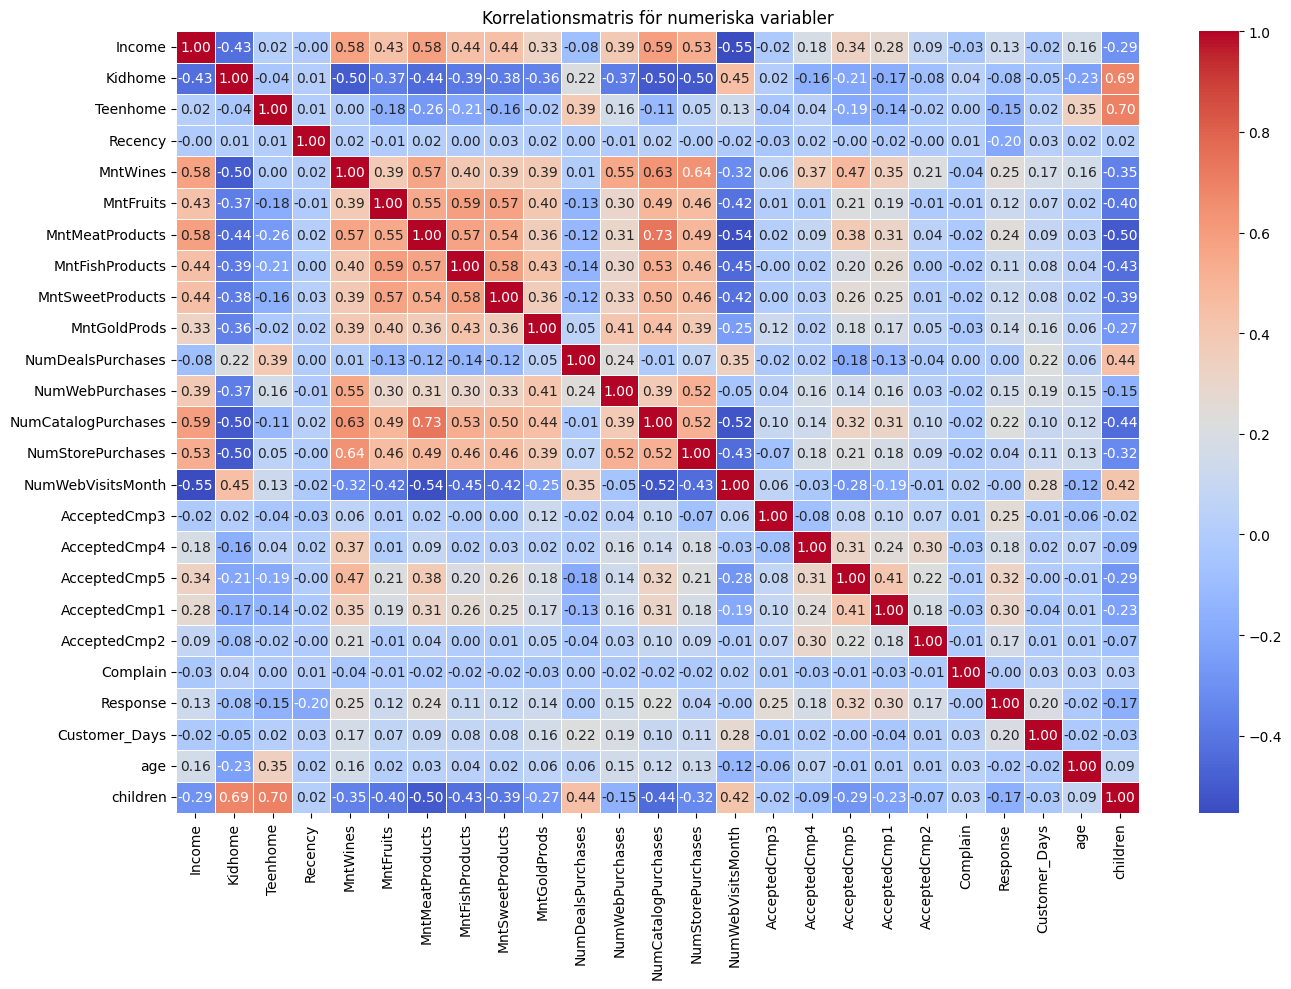

In [4]:


# Beräkna korrelationer (endast numeriska kolumner)
correlation_matrix = marketing_cl_df.corr(numeric_only=True)

# Rita heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, 
            cmap='coolwarm', 
            annot=True,      # visa värden
            fmt=".2f", 
            linewidths=0.5)

plt.title("Korrelationsmatris för numeriska variabler")
plt.tight_layout()
plt.show()

MntWines, MntMeatProducts och MntGoldProds har positiv korrelation → vissa kunder spenderar mycket på flera typer av produkter. stark positiv korrelation med income

NumCatalogPurchases och NumstorPurchases hänger ofta ihop.

Mer barn, mer Numdealspurchases och NumwebvisitsMonth

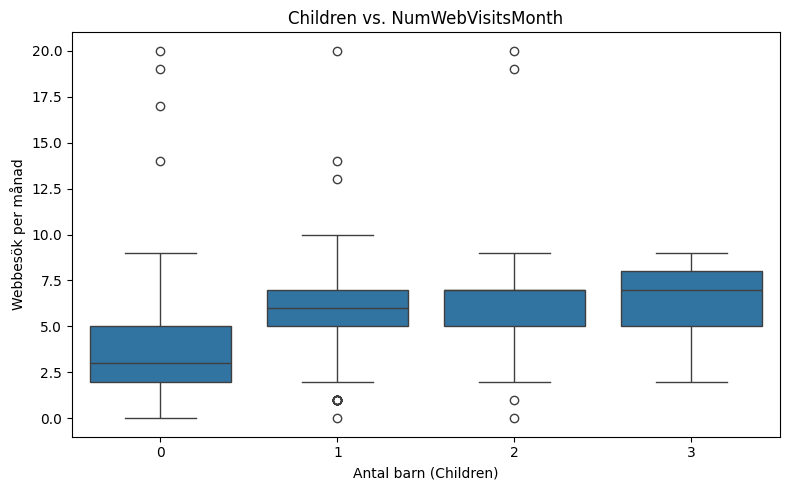

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='children', y='NumWebVisitsMonth', data=marketing_cl_df)
plt.title("Children vs. NumWebVisitsMonth")
plt.xlabel("Antal barn (Children)")
plt.ylabel("Webbesök per månad")
plt.tight_layout()
plt.show()

Children vs. NumDealsPurchases
Kunder med fler barn (2–3) verkar göra fler kampanjbaserade köp.

Medianen för NumDealsPurchases ökar med antalet barn.

Möjlig tolkning: familjer är mer priskänsliga och letar efter erbjudanden.



In [7]:
marketing_cl_df.groupby('children')['NumWebVisitsMonth'].median()

children
0    3.0
1    6.0
2    7.0
3    7.0
Name: NumWebVisitsMonth, dtype: float64

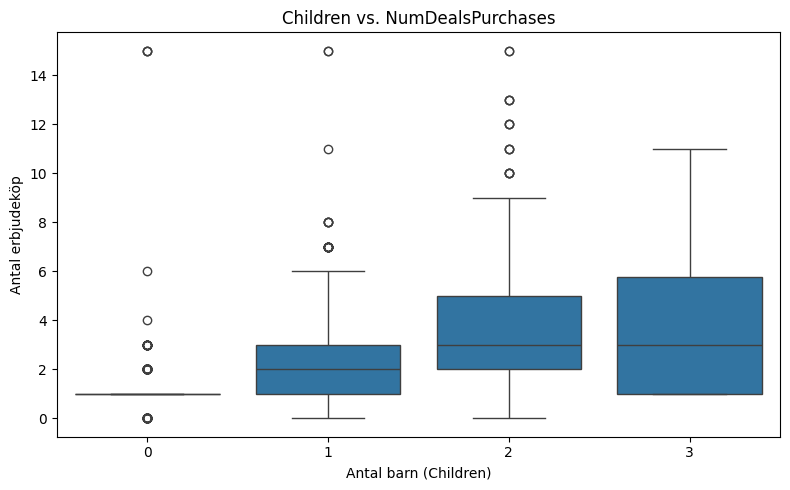

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='children', y='NumDealsPurchases', data=marketing_cl_df)
plt.title("Children vs. NumDealsPurchases")
plt.xlabel("Antal barn (Children)")
plt.ylabel("Antal erbjudeköp")
plt.tight_layout()
plt.show()

Children vs. NumWebVisitsMonth
Kunder med fler barn tenderar att ha fler webbplatsbesök per månad.

Skillnaden är tydlig särskilt mellan 0 och 2–3 barn.

Möjlig tolkning: småbarnsfamiljer kanske handlar online oftare pga. bekvämlighet.